<a href="https://colab.research.google.com/github/truc-h-nguyen/Toddler-activity-suggestions/blob/main/B_Save_object_datasets_from_COCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. LOAD IMAGES FROM COCO DATASET:**

In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip

In [ ]:
!unzip train2017.zip

In [3]:
!rm train2017.zip

In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip

In [ ]:
!unzip val2017.zip

In [8]:
!rm val2017.zip

In [ ]:
!wget http://images.cocodataset.org/zips/test2017.zip

In [ ]:
!unzip test2017.zip

In [11]:
!rm test2017.zip

In [23]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-11-07 00:35:13--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.237.155
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.237.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip.1’

annotations_trainva 100%[===================>] 241.19M  99.2MB/s    in 2.4s    

2021-11-07 00:35:15 (99.2 MB/s) - ‘annotations_trainval2017.zip.1’ saved [252907541/252907541]



In [ ]:
!unzip annotations_trainval2017.zip

In [25]:
!rm annotations_trainval2017.zip

In [26]:
!ls

annotations			sample_data  train2017
annotations_trainval2017.zip.1	test2017     val2017


In [ ]:
!pip install gluoncv

In [ ]:
!pip install mxnet

In [16]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [28]:
train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=26.47s)
creating index...
index created!
loading annotations into memory...
Done (t=0.55s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


# Preprocessing: 

In [29]:
#Names of classes in dataset:
#Show the first 10 classes
train_dataset.classes[:10]

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light']

In [30]:
#The second picture in the train dataset:
train_dataset[1]

(
 [[[  8   9   4]
   [  8   9   4]
   [  7   8   3]
   ...
   [ 59  60  64]
   [ 58  57  65]
   [ 71  69  80]]
 
  [[  8   9   4]
   [  8   9   4]
   [  7   8   3]
   ...
   [151 150 155]
   [148 147 153]
   [150 149 157]]
 
  [[  8   9   4]
   [  7   8   3]
   [  7   8   3]
   ...
   [187 187 189]
   [180 179 184]
   [172 171 176]]
 
  ...
 
  [[191 189  86]
   [174 166  68]
   [148 132  44]
   ...
   [154 120  93]
   [140 106  78]
   [133 100  69]]
 
  [[192 186  92]
   [154 159  69]
   [137 134  39]
   ...
   [126  96  72]
   [145 115  91]
   [139 109  83]]
 
  [[136 129  38]
   [119 123  36]
   [120 117  24]
   ...
   [127  97  73]
   [145 115  91]
   [139 109  83]]]
 <NDArray 426x640x3 @cpu(0)>, array([[385.53,  60.03, 599.5 , 356.19,  23.  ],
        [ 53.01, 356.49, 184.04, 410.68,  23.  ]]))

From the code above, we know that the second image has a size of 426x640 pixels, 3 color channel RGB.

We have 2 bounding boxes but with the same labels no.24 which is giraffe in COCO dataset (check [here](https://github.com/pjreddie/darknet/blob/master/data/coco.names) for COCO's IDs)

We will show picture of the second image of COCO's train set.

In [31]:
train_image, train_label = train_dataset[1]
#train_label includes information of bounding boxes: x_min, y_min, x_max, y_max, labels
print("Bounding boxes: x_min, y_min, x_max, y_max, labels: \n", train_label)
#train_image includes information of the image: matrix??, shape
print("Image information:", train_image) 

Bounding boxes: x_min, y_min, x_max, y_max, labels: 
 [[385.53  60.03 599.5  356.19  23.  ]
 [ 53.01 356.49 184.04 410.68  23.  ]]
Image information: 
[[[  8   9   4]
  [  8   9   4]
  [  7   8   3]
  ...
  [ 59  60  64]
  [ 58  57  65]
  [ 71  69  80]]

 [[  8   9   4]
  [  8   9   4]
  [  7   8   3]
  ...
  [151 150 155]
  [148 147 153]
  [150 149 157]]

 [[  8   9   4]
  [  7   8   3]
  [  7   8   3]
  ...
  [187 187 189]
  [180 179 184]
  [172 171 176]]

 ...

 [[191 189  86]
  [174 166  68]
  [148 132  44]
  ...
  [154 120  93]
  [140 106  78]
  [133 100  69]]

 [[192 186  92]
  [154 159  69]
  [137 134  39]
  ...
  [126  96  72]
  [145 115  91]
  [139 109  83]]

 [[136 129  38]
  [119 123  36]
  [120 117  24]
  ...
  [127  97  73]
  [145 115  91]
  [139 109  83]]]
<NDArray 426x640x3 @cpu(0)>


In [32]:
#From the train label shape, we know number of detected objects
print("\nTrain label shape:",train_label.shape)
print("=> Number of detected objects:",train_label.shape[0])
print("Image size (height, width, RGB):", train_image.shape)


Train label shape: (2, 5)
=> Number of detected objects: 2
Image size (height, width, RGB): (426, 640, 3)


In [44]:
class_ids = train_label[:,4:5]
print(class_ids)
for i in range(len(class_ids)):
  print(f'Name of detected objects: {class_ids[i]}, {train_dataset.classes[int(class_ids[i])]}')

[[23.]
 [23.]]
Name of detected objects: [23.], giraffe
Name of detected objects: [23.], giraffe


Drop labels in bounding boxes:
 [[385.53  60.03 599.5  356.19]
 [ 53.01 356.49 184.04 410.68]]


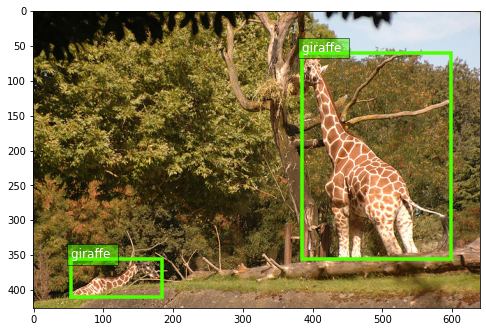

In [45]:
#To avoid "too many values to unpack" error:
bounding_boxes = train_label[:,:4]
print("Drop labels in bounding boxes:\n", bounding_boxes)
#Visualize bounding boxes:
utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes,scores = None,labels=class_ids,class_names=train_dataset.classes)
plt.show()

**B. SAVE OBJECT DATASETS:**

For example, we save an object such that bowls into separate datasets. 

That dataset includes images and annotations (bounding boxes) for the objects.

In [ ]:
import cv2
import matplotlib as plt
import numpy as np

In [ ]:

#Class ID of bowls is 46
